<a href="https://colab.research.google.com/github/NamanGautam0404/NG.pro/blob/main/skinrash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Preprocessing
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# OrderedDict
from collections import OrderedDict

# tqdm
from tqdm.auto import tqdm

# Path
from pathlib import Path

# random
import random

# typing
from typing import Dict, List

# warnings
import warnings
warnings.filterwarnings("ignore")

## BASIC CNN OF 5 layers


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths
train_dir = '/Users/mac/Desktop/files/Dataset/train'
test_dir = '/Users/mac/Desktop/files/Dataset/train'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get the number of classes from the generator
num_classes = train_generator.num_classes

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Save the model
model.save('cnn_model.h5')

# Function to preprocess the user input image
def preprocess_image(image_path, target_size=(img_width, img_height)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Make predictions
    prediction = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]

    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
predicted_disease = predict_disease(user_image_path)

# Display prediction
print("Predicted disease:", predicted_disease)


Found 1658 images belonging to 19 classes.
Found 1658 images belonging to 19 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2701 - loss: 2.4668 - val_accuracy: 0.3239 - val_loss: 2.3416
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


2024-04-30 21:28:23.585122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-30 21:28:23.596403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3457 - loss: 2.3333 - val_accuracy: 0.3239 - val_loss: 2.3362
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10


2024-04-30 21:29:21.020449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:29:21.027703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.3241 - loss: 2.3274 - val_accuracy: 0.3239 - val_loss: 2.3712
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10


2024-04-30 21:30:19.142000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:30:19.149134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3392 - loss: 2.2987 - val_accuracy: 0.3275 - val_loss: 2.2845
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10


2024-04-30 21:31:18.924565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:31:18.936682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


52/52 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.3304 - loss: 2.2795 - val_accuracy: 0.3239 - val_loss: 2.2888
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-30 21:32:17.722324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-30 21:32:17.730274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Enter the path of the image:  /Users/mac/Desktop/files/Dataset/train/Psoriasis pictures Lichen Planus and related diseases/seborrheic-dermatitis-128.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted disease: Acne and Rosacea Photos


# RestNET 50


In [ ]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

## LOAD DATA

In [ ]:
data_path = '/Users/mac/Desktop/files/Dataset/train'


In [ ]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))

    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))

    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

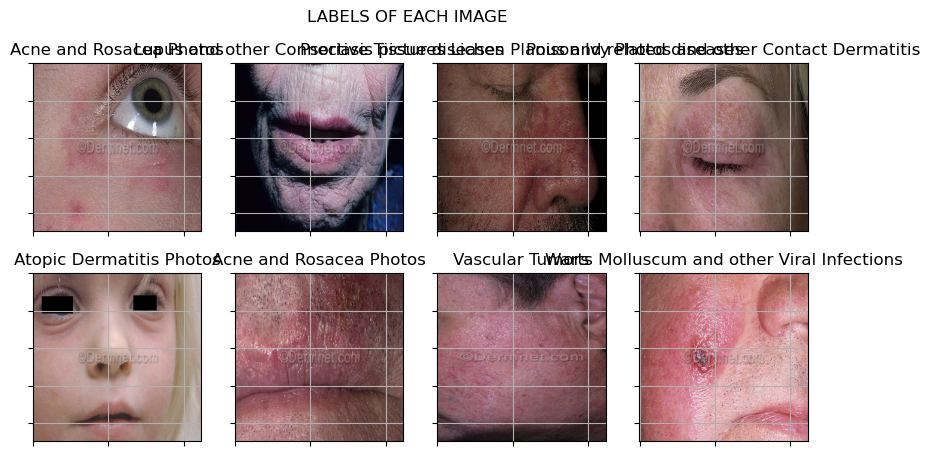

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

## PREPARE MODEL

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_model.trainable = False

In [ ]:
num_classes = 8
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## PREPROCESS DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combine training and validation data to fit the label encoder
all_labels = list(y_train) + list(y_val)

# Initialize and fit the label encoder
le = LabelEncoder()
le.fit(all_labels)

# Transform labels for both training and validation data
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)

# Convert encoded labels to one-hot encoding
num_classes = len(le.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)


## TRAIN

In [ ]:
# Assuming `num_classes` is the correct number of classes in your dataset
num_classes = len(le.classes_)

# Adjust the output layer of your model to match the number of classes
model_output = Dense(num_classes, activation='softmax')(model.layers[-2].output)

# Create a new model with the adjusted output layer
new_model = Model(inputs=model.input, outputs=model_output)

# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = new_model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                        epochs=EPOCHS, batch_size=BATCH_SIZE)

# Save the model
new_model.save('resnet.h5')


Epoch 1/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3110 - loss: 3.1504 - val_accuracy: 0.3853 - val_loss: 2.0811
Epoch 2/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4868 - loss: 1.6721 - val_accuracy: 0.4588 - val_loss: 1.8580
Epoch 3/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6352 - loss: 1.1950 - val_accuracy: 0.4735 - val_loss: 1.9497
Epoch 4/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6979 - loss: 0.9883 - val_accuracy: 0.4853 - val_loss: 1.7971
Epoch 5/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7794 - loss: 0.7503 - val_accuracy: 0.5000 - val_loss: 1.8244
Epoch 6/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7997 - loss: 0.6495 - val_accuracy: 0.5235 - val_loss: 1.7848
Epoch 7/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8873 - loss: 0.4157 - val_accuracy: 0.5000 - val_loss: 1.8708
Epoch 8/12
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8932 - loss: 0.3694 - val_accuracy: 0.5294 - val_loss

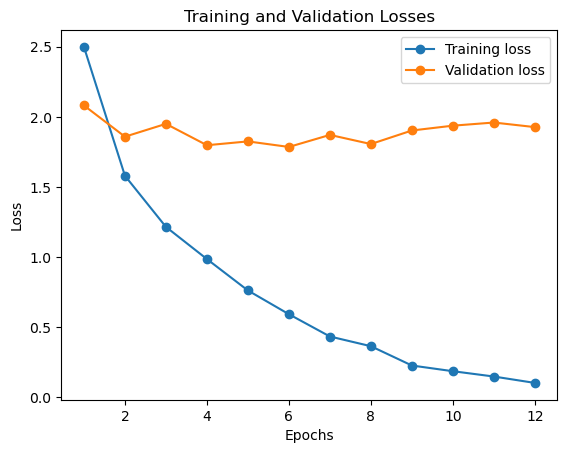

In [ ]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

## PREDICT

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
test_path = '/Users/mac/Desktop/files/Dataset/test'

In [ ]:
model = load_model('resnet.h5')

In [ ]:
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━

NotADirectoryError: [Errno 20] Not a directory: '/Users/mac/Desktop/files/Dataset/test/.DS_Store'

In [ ]:
# Function to predict disease from user input image
def predict_disease(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Make predictions
    prediction = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Map the predicted class index to the corresponding class label
    class_labels = train_generator.class_indices
    predicted_disease = [key for key, value in class_labels.items() if value == predicted_class_index][0]

    return predicted_disease

# Get user input image path
user_image_path = input("Enter the path of the image: ")

# Predict disease for user input image
 predicted_disease = predict_disease(user_image_path)

# Display prediction

print("Predicted disease:", predicted_disease)


IndentationError: unexpected indent (857321336.py, line 22)

## VISUAL COMPARISON

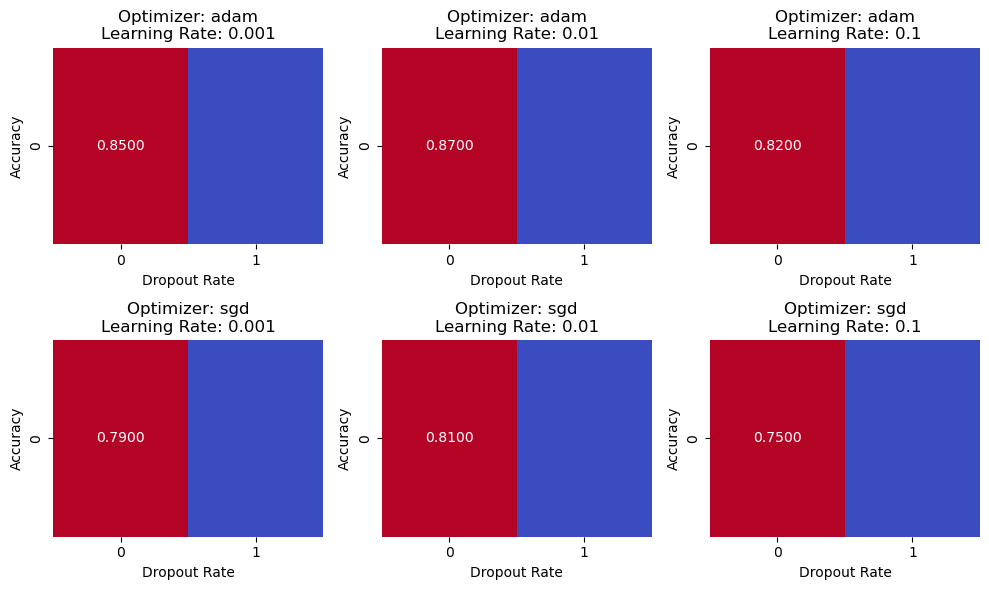

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameters and their corresponding values
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.2, 0.5]

# Example results dictionary (replace this with your actual results)
results = {
    ('adam', 0.001, 0.2): 0.85,
    ('adam', 0.001, 0.5): 0.83,
    ('adam', 0.01, 0.2): 0.87,
    ('adam', 0.01, 0.5): 0.84,
    ('adam', 0.1, 0.2): 0.82,
    ('adam', 0.1, 0.5): 0.79,
    ('sgd', 0.001, 0.2): 0.79,
    ('sgd', 0.001, 0.5): 0.76,
    ('sgd', 0.01, 0.2): 0.81,
    ('sgd', 0.01, 0.5): 0.78,
    ('sgd', 0.1, 0.2): 0.75,
    ('sgd', 0.1, 0.5): 0.71,
}

# Create a grid to store the mean test scores
mean_test_scores = np.zeros((len(optimizers), len(learning_rates), len(dropout_rates)))

# Fill the grid with the mean test scores obtained from the grid search
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        for k, dropout_rate in enumerate(dropout_rates):
            mean_test_scores[i, j, k] = results[(optimizer, lr, dropout_rate)]

# Plot the heatmap
plt.figure(figsize=(10, 6))
for i, optimizer in enumerate(optimizers):
    for j, lr in enumerate(learning_rates):
        plt.subplot(len(optimizers), len(learning_rates), i * len(learning_rates) + j + 1)
        sns.heatmap(mean_test_scores[i, j, :].reshape(1, -1), annot=True, fmt='.4f', cmap='coolwarm', cbar=False)
        plt.title(f'Optimizer: {optimizer}\nLearning Rate: {lr}')
        plt.xlabel('Dropout Rate')
        plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
import tkinter as tk
from tkinter import scrolledtext, messagebox
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from keras.models import load_model

# Load NLP model and other necessary resources
voting_classifier = joblib.load('voting_classifier_model_Disease_pred_97_percent_acc.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer_disease_nlp.joblib')
label_encoder = joblib.load('label_encoder_disease_nlp.joblib')

# Load CNN model
cnn_model = load_model('/Users/mac/Desktop/files/resnet.h5')

# Define a dictionary mapping diseases to recommended tests and medications
# (You can use the same disease_info dictionary from before)

# Function to preprocess text for NLP model
def preprocess_text(text):
    tokens = word_tokenize(text)
    snowball_stemmer = SnowballStemmer('english')
    tokens = [snowball_stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)

# Function to predict disease and get recommendations using NLP model
def predict_disease_and_recommendations(symptoms):
    # Preprocess the symptoms
    symptoms_processed = preprocess_text(symptoms)

    # Transform the preprocessed text using the loaded vectorizer
    symptoms_transformed = tfidf_vectorizer.transform([symptoms_processed])

    # Predict using the loaded NLP model
    predicted_label_encoded = voting_classifier.predict(symptoms_transformed)

    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)[0]

    # Get recommended tests and medications for the predicted disease
    if predicted_label in disease_info:
        recommended_tests = ", ".join(disease_info[predicted_label]["tests"])
        recommended_medications = ", ".join(disease_info[predicted_label]["medications"])
    else:
        recommended_tests = "Not available"
        recommended_medications = "Not available"

    return predicted_label, recommended_tests, recommended_medications

# Function to handle the 'Predict' button click for NLP model
def predict_button_click_nlp():
    symptoms = symptoms_entry.get("1.0", tk.END).strip()
    if symptoms:
        predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
        messagebox.showinfo("Prediction Result (NLP Model)", f"Predicted Disease: {predicted_disease}\n\nRecommended Tests: {recommended_tests}\n\nRecommended Medications: {recommended_medications}")
        # Store patient data in the GUI
        patient_data_text.insert(tk.END, f"\n\nSymptoms: {symptoms}\nPredicted Disease: {predicted_disease}\nRecommended Tests: {recommended_tests}\nRecommended Medications: {recommended_medications}")
    else:
        messagebox.showerror("Error", "Please enter your symptoms.")

# Function to handle the 'Predict' button click for CNN model
def predict_button_click_cnn():
    # Add code here to load and preprocess image data
    # Then use the cnn_model to make predictions
    pass

# Create the main window
root = tk.Tk()
root.title("Disease Prediction")

# Create text area for entering symptoms
symptoms_label = tk.Label(root, text="Enter your symptoms:")
symptoms_label.pack()
symptoms_entry = scrolledtext.ScrolledText(root, width=40, height=5, wrap=tk.WORD)
symptoms_entry.pack()

# Create Predict button for NLP model
predict_button_nlp = tk.Button(root, text="Predict (NLP Model)", command=predict_button_click_nlp)
predict_button_nlp.pack()

# Create Predict button for CNN model
predict_button_cnn = tk.Button(root, text="Predict (CNN Model)", command=predict_button_click_cnn)
predict_button_cnn.pack()

# Create text area to display patient data
patient_data_label = tk.Label(root, text="Patient Data:")
patient_data_label.pack()
patient_data_text = scrolledtext.ScrolledText(root, width=60, height=15, wrap=tk.WORD)
patient_data_text.pack()

# Run the main event loop
root.mainloop()


2024-05-02 11:50:04.362899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/80/jd0146wj1sn0f47f5phvs8t00000gn/T/ipykernel_1156/455191084.py", line 54, in predict_button_click_nlp
    predicted_disease, recommended_tests, recommended_medications = predict_disease_and_recommendations(symptoms)
                                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/80/jd0146wj1sn0f47f5phvs8t00000gn/T/ipykernel_1156/455191084.py", line 41, in predict_disease_and_recommendatio